In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# cryptanalysis resource : https://www3.nd.edu/~busiforc/handouts/cryptography/cryptography%20hints.html

def read_file(file):
    words = []
    with open(file, 'r') as f:
        for line in f:
            if line.strip() and line[0] != '\n': 
                for word in line.strip().split(" "):
                    words.append(word)
    return words


def get_common_words_by_length(cipher ,i):
    cipher = list(filter(lambda x: len(x) == i, cipher))
    common = {}
    for i in range(len(cipher)):
        common[cipher[i]] = common.get(cipher[i], 0) + 1

    common = dict(sorted(common.items(), key=lambda item: item[1], reverse=True))
    return common


for i in range(1,5): 
    print(get_common_words_by_length(read_file("encrypted_text.txt"), i))

{'E': 36, 'R': 14}
{'RK': 43, 'KP': 40, 'PN': 28, 'RM': 14, 'PM': 12, 'VP': 11, 'XG': 10, 'PB': 9, 'EV': 7, 'EK': 7, 'TI': 6, 'UI': 6, 'MP': 4, 'PH': 4, 'RN': 4, 'TW': 3, 'OP': 2, 'RV': 2, 'UW': 2, 'EM': 1}
{'KHI': 65, 'VHI': 59, 'EMO': 46, 'YEV': 38, 'HIB': 19, 'TXK': 13, 'MPK': 12, 'HEO': 11, 'NPB': 9, 'PXK': 7, 'YEW': 7, 'LIW': 6, 'SIK': 5, 'KPP': 5, 'PMI': 5, 'WPX': 5, 'ECC': 5, 'HPY': 5, 'VII': 4, 'PNN': 4, 'RKV': 3, 'EMW': 3, 'RCC': 3, 'XVI': 2, 'BEM': 2, 'ORO': 2, 'VEW': 2, 'VEY': 2, 'DEB': 2, 'TRK': 2, 'CPY': 2, 'MPY': 2, 'IEK': 2, 'AEM': 2, 'PYM': 1, 'OEW': 1, 'MPB': 1, 'GPG': 1, 'GXK': 1, 'IMO': 1, 'AEK': 1, 'OBW': 1, 'CRK': 1, 'BPY': 1, 'CIO': 1, 'HPK': 1, 'KIM': 1, 'SPK': 1, 'VEK': 1, 'IWI': 1, 'TPJ': 1, 'EKI': 1, 'KPG': 1, 'VIK': 1}
{'OPYM': 16, 'KHEK': 15, 'QIBW': 14, 'RMKP': 8, 'YHIM': 8, 'YRKH': 8, 'CRLI': 7, 'VERO': 7, 'YIMK': 6, 'YIBI': 6, 'OPPB': 6, 'YICC': 5, 'KRUI': 5, 'YHEK': 4, 'XGPM': 4, 'VPPM': 4, 'HECC': 4, 'KHRV': 4, 'TPPL': 3, 'UXAH': 3, 'OIEB': 3, 'KHIM': 3

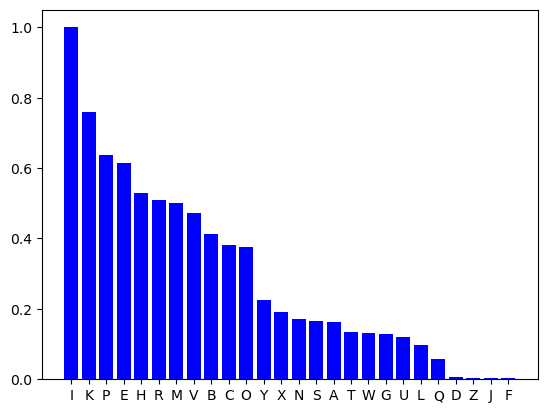

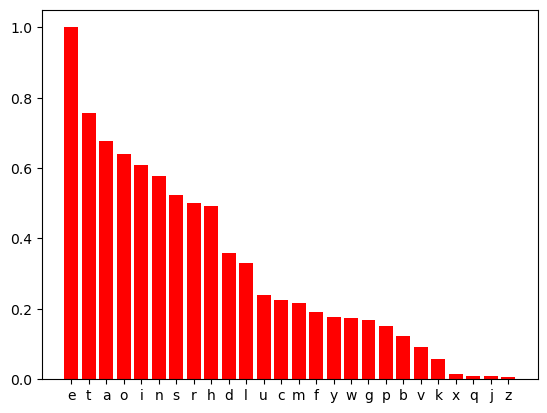

In [9]:

english_freq = {
    'e': 12.02, 't': 9.10, 'a': 8.12, 'o': 7.68, 'i': 7.31, 'n': 6.95, 's': 6.28, 'r': 6.02, 'h': 5.92, 'd': 4.32, 'l': 3.98, 'u': 2.88, 'c': 2.71, 'm': 2.61, 'f': 2.30, 'y': 2.11, 'w': 2.09, 'g': 2.03, 'p': 1.82, 'b': 1.49, 'v': 1.11, 'k': 0.69, 'x': 0.17, 'q': 0.11, 'j': 0.10, 'z': 0.07
}
def get_cosets(array, offset=0): 
    result = []
    for i in range(offset):
        result.append(array[i::offset])
    return result

def read_file_continuous(file):
    words = ""
    lenOfWords = []
    with open(file, 'r') as f:
        for line in f:
            if line.strip() and line[0] != '\n': 
                for word in line.strip().split(" "):
                    words += word
                    lenOfWords.append(len(word))
    return words, lenOfWords

cipher_text, lenOfWords = read_file_continuous("encrypted_text.txt")

i = 1
key = ""
cosets = get_cosets(cipher_text, i)

histograms = []
for coset in cosets:
    hist = {}
    for char in coset:
        hist[char] = hist.get(char, 0) + 1
    histograms.append(hist)


for i, histogram in enumerate(histograms):
    histogram = dict(sorted(histogram.items(), key=lambda item: item[1], reverse=True))
    plt.figure(i)
    plt.bar(histogram.keys(), [value/max(histogram.values()) for value in histogram.values()]
        , color = 'b')
    plt.title("cipher character frequency")
    plt.show()


plt.bar(english_freq.keys(), [value/max(english_freq.values()) for value in english_freq.values()]
        , color = 'r')
plt.title("english character frequency")
plt.show()


In [32]:
# Attempts with vegener cipher 
# I am an Idiot


cipher_text, lenOfWords = read_file_continuous("encrypted_text.txt")

length = [19, 14, 16, 7]



def get_cosets(array, offset=0): 
    result = []
    for i in range(offset):
        result.append(array[i::offset])
    return result


# for i in range(1, 20):
i = 1
key = ""
cosets = get_cosets(cipher_text, i)

histograms = []
for coset in cosets:
    hist = {}
    for char in coset:
        hist[char] = hist.get(char, 0) + 1
    histograms.append(hist)


# for hist in histograms:
#     print(hist)

for hist in histograms:
    hist = dict(sorted(hist.items(), key=lambda item: item[1], reverse=True))
    # print(hist)
    key += list(hist.keys())[0]
    
# print(key)
with open(f"attmept/attempt{i}.txt", "w") as f:
    deciphered = decipher(cipher_text, key)
    for i in lenOfWords:
        f.write(deciphered[:i] + " ")
        deciphered = deciphered[i:]

In [33]:
def n_grams (text, n=2):
    result = []
    for i, char in enumerate(text): 
        result.append((text[i:i+n], i))
    return result

def find_similar(grams):
    result= []
    for i in range(len(grams)):
        for j in range(i+1, len(grams)):
            if grams[i][0] == grams[j][0]:
                result.append((grams[j][1]-grams[i][1], grams[i][0]))

    result = sorted(result, key=lambda x: x[0], reverse=True)
    return result



nums = []
for i in range(3, 7): 
    grams = n_grams(cipher_text, i)
    similar = find_similar(grams)
    for j in similar:
        nums.append(j[0])

nums = list(set(nums))
nums.sort()

factor_results = []

for i in range(2, 21): 
    result = 0
    for num in nums:
        if num%i == 0: 
            result += 1
    factor_results.append((i,result))

sorted(factor_results, key=lambda x: x[1], reverse=True)



# indexOfCoincidences = []
# for i in range(1, 20):
#     cosets = get_cosets(cipher_text, i)
#     avg = 0
#     for coset in cosets:
#         avg += indexOfCoincidence(coset)
#     indexOfCoincidences.append((i, avg/i))

# indexOfCoincidences = sorted(indexOfCoincidences, key=lambda x: x[1], reverse=True)
# print(indexOfCoincidences)



[(2, 2300),
 (3, 1522),
 (4, 1142),
 (5, 912),
 (6, 766),
 (7, 657),
 (8, 570),
 (9, 516),
 (10, 459),
 (11, 416),
 (12, 379),
 (13, 354),
 (14, 332),
 (15, 300),
 (16, 287),
 (17, 267),
 (18, 258),
 (19, 240),
 (20, 231)]

In [ ]:
# Scraped 

def translation_table(histogram):
    table = {}
    hist_sorted = dict(sorted(histogram.items(), key=lambda item: item[1], reverse=True))
    eng = list(english_freq.keys())
    for i,char in enumerate(hist_sorted.keys()):
        table[char] = eng[i]
    return table

def indexOfCoincidence(text): 
    N = len(text)
    freq = {}
    for char in text:
        if char in freq:
            freq[char] += 1
        else:
            freq[char] = 1
    I = 0

    for char in freq.keys():
        I += (freq[char] * (freq[char] - 1)) / (N * (N - 1))

    return I



# def decipher(text: str, key):
#     j = 0
#     for i,char in enumerate(text):
#         new_char = chr((((ord(char)-65) - (ord(key[j]) - 65)) % 26) + 65)
#         text = text[:i] + new_char + text[i+1:]
#         j = (j+1) % len(key)
#     return text
